In [ ]:
# Data handling
import pandas as pd

# ML models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier  # Used in both blocks

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# K-MEAN
from sklearn.cluster import KMeans

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Model tuning
from sklearn.model_selection import GridSearchCV

# Tree visualization
from sklearn.tree import export_text, export_graphviz
import graphviz
from IPython.display import Image
from io import StringIO
import pydotplus
import numpy as np

# KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier  # Used in both blocks
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
filepath='/content/sample_data/Dry_Bean_Dataset.xlsx'

In [ ]:

# Load data
df = pd.read_excel(filepath)

In [ ]:
# Print the column names
print(df.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [ ]:
# Xem xét cấu trúc của dữ liệu
print("Số dòng và số cột trong bộ dữ liệu:")
print(df.shape)
print("\nThông tin về cấu trúc của dữ liệu:")
print(df.info())

Số dòng và số cột trong bộ dữ liệu:
(13611, 17)

Thông tin về cấu trúc của dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     136

In [ ]:
# Thống kê mô tả
print("\nThống kê mô tả của các biến:")
print(df.describe())



Thống kê mô tả của các biến:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086 

In [ ]:
# Kiểm tra giá trị duy nhất của biến mục tiêu
target_variable = 'Class'
unique_classes = df[target_variable].unique()
print("Các lớp duy nhất trong biến mục tiêu:", unique_classes)

Các lớp duy nhất trong biến mục tiêu: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']



**Trong tập dữ liệu Dry Bean Dataset có 7 loại đậu khác nhau: **

Barbunya: một loại đậu gần giống đậu gà

Bombay: một loại đậu màu đỏ

Cali: một loại đậu trắng nhỏ

Dermosan: một loại đậu vừa phải màu trắng đục

Horoz: một loại đậu màu vàng và đỏ

Seker: một loại đậu tròn màu hồng nhạt

Yesil: một loại đậu xanh lục


In [ ]:
# Chuyển đổi biến mục tiêu thành dạng số nếu cần
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class']).astype(int)
# Chuyển đổi cột Class thành dạng số nguyên và thay lại DataFrame
df['Class'] = df['Class'].astype(int)


In [ ]:
# Tách dữ liệu thành features (X) và target (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [ ]:
# In số lượng dòng trùng lặp trước khi xử lý
print("Số lượng dòng trùng lặp trước khi xử lý:", df.duplicated().sum())

# Loại bỏ dòng trùng lặp và giữ lại dòng đầu tiên (keep='first')
df_no_duplicates = df.drop_duplicates(keep='first')

# In số lượng dòng trùng lặp sau khi xử lý
print("Số lượng dòng trùng lặp sau khi xử lý:", df_no_duplicates.duplicated().sum())


Số lượng dòng trùng lặp trước khi xử lý: 68
Số lượng dòng trùng lặp sau khi xử lý: 0


In [ ]:
df['Class'] = df['Class'].astype(int)


In [ ]:
df['Class'] = df['Class'].astype(int)


In [ ]:
# Lấy các thông số mô tả
summary_stats = df.describe()

# Chuyển đổi giá trị mean và std sang số nguyên
summary_stats.loc['mean'] = summary_stats.loc['mean'].astype(int)
summary_stats.loc['std'] = summary_stats.loc['std'].astype(int)

# In thống kê mô tả đã được chỉnh sửa
print("Thống kê mô tả tổng quan:")
print(summary_stats)


Thống kê mô tả tổng quan:
           Area   Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
count   13611.0  13611.0000     13611.000000     13611.000000  13611.000000   
mean    53048.0    855.0000       320.000000       202.000000      1.000000   
std     29324.0    214.0000        85.000000        44.000000      0.000000   
min     20420.0    524.7360       183.601165       122.512653      1.024868   
25%     36328.0    703.5235       253.303633       175.848170      1.432307   
50%     44652.0    794.9410       296.883367       192.431733      1.551124   
75%     61332.0    977.2130       376.495012       217.031741      1.707109   
max    254616.0   1985.3700       738.860153       460.198497      2.430306   

       Eccentricity  ConvexArea  EquivDiameter        Extent      Solidity  \
count  13611.000000     13611.0   13611.000000  13611.000000  13611.000000   
mean       0.000000     53768.0     253.000000      0.000000      0.000000   
std        0.000000     2977

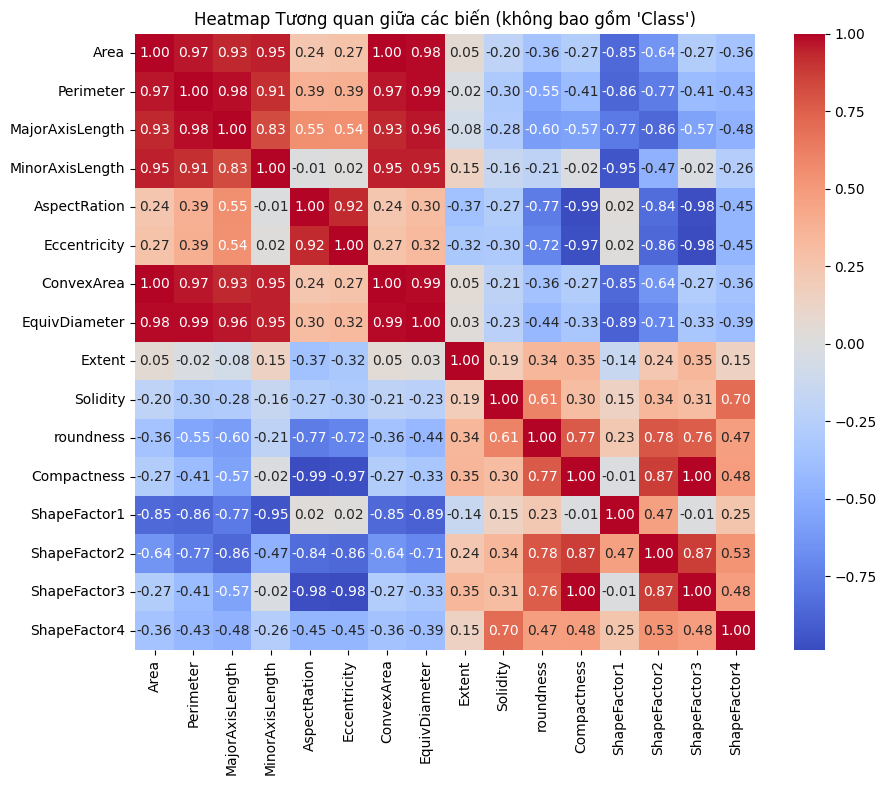

In [ ]:
# Tạo dataframe mới chỉ chứa các biến không bao gồm 'Class'
df_no_class = df.drop('Class', axis=1)

# Tính ma trận tương quan giữa các biến
correlation_matrix_no_class = df_no_class.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_class, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Tương quan giữa các biến (không bao gồm 'Class')")
plt.show()


**Biểu đồ Tần suất của Thuộc tính" hoặc "Biểu đồ Histogram**

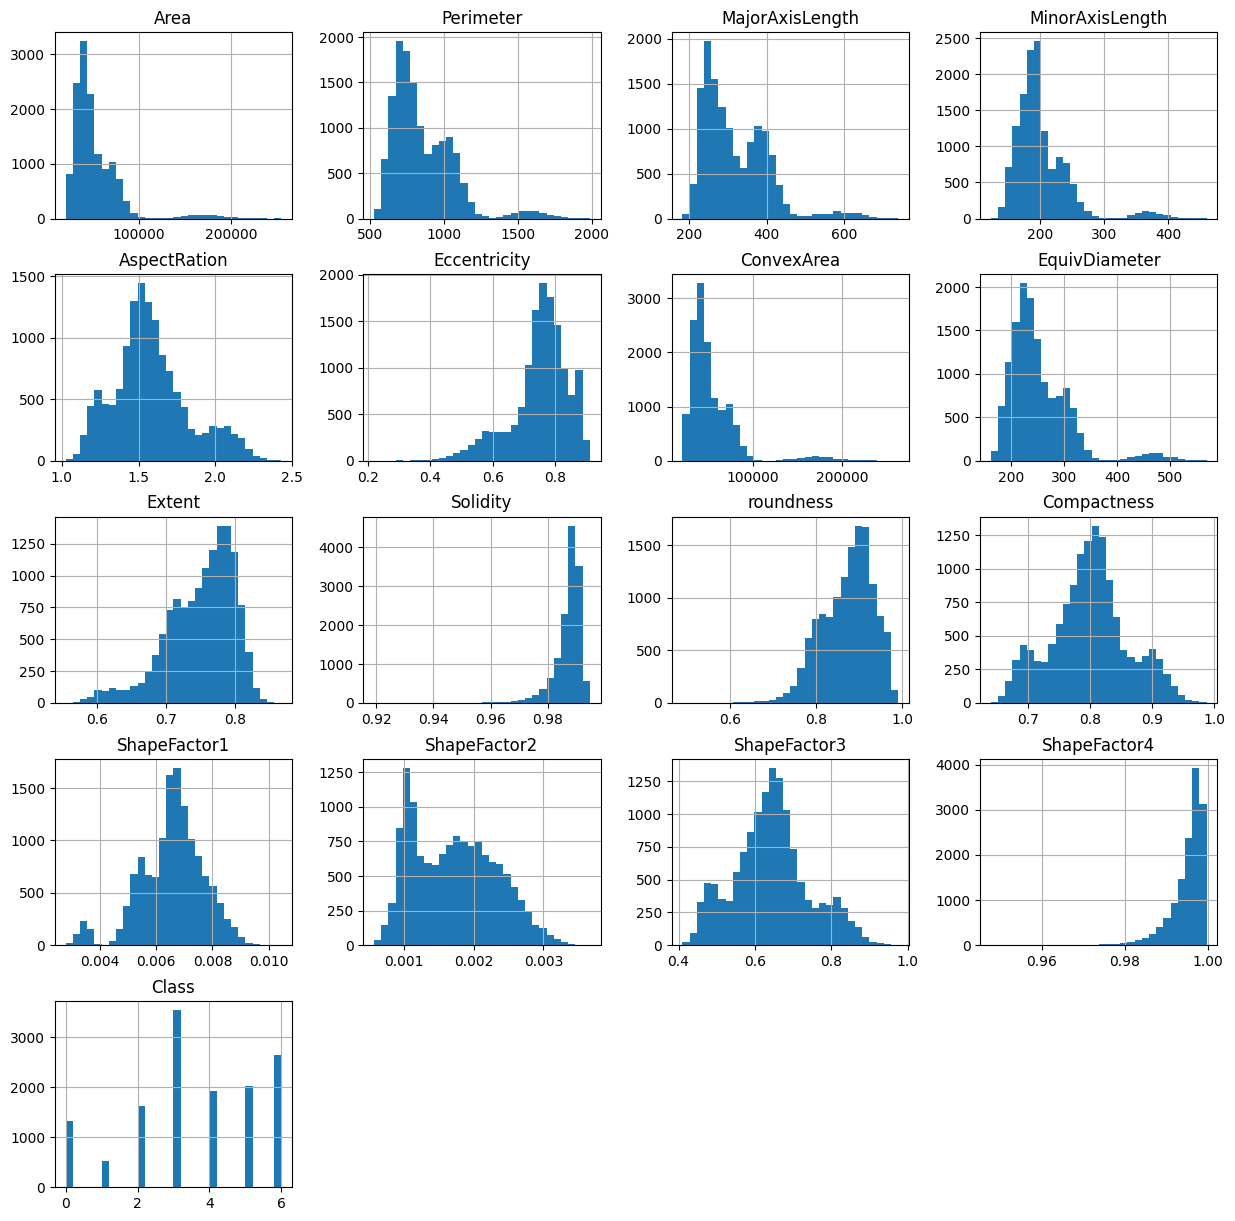

In [ ]:
df.hist(bins=30, figsize=(15,15))
plt.show()

Label Encoding(MÃ HÓA NNHÃN SỐ)

In [ ]:
labelencoder = LabelEncoder()
# CLASS là 1 dạng srt nên chuyển sang dạng số
df["Class"] = labelencoder.fit_transform(df['Class'])

df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


In [ ]:
# xóa cột class
X = df.drop(columns='Class')
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

[0.06374535 0.07574285 0.07237014 0.0749402  0.07229703 0.07062112
 0.06495513 0.07158578 0.01429831 0.01806744 0.06053496 0.07574012
 0.08220288 0.07037449 0.08486528 0.02765892]


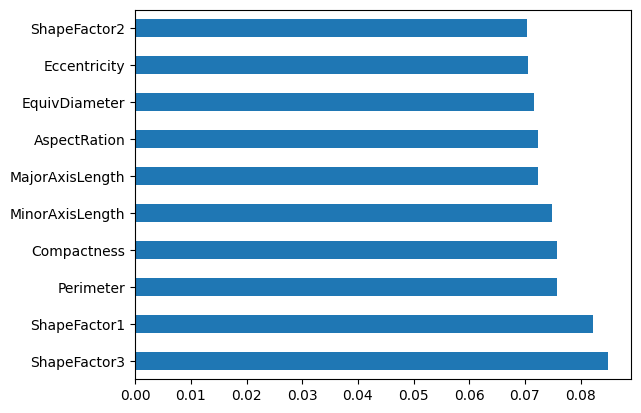

In [ ]:
model = ExtraTreesClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Kết quả này là giá trị của độ quan trọng của các đặc trưng (features) được tính bằng mô hình ExtraTreesClassifier. Giá trị càng cao cho thấy đặc trưng đó càng quan trọng đối với mô hình. Dưới đây là phần giải thích của mỗi giá trị:

Feature 1 (0.06374535)

Feature 2 (0.07574285)

Feature 3 (0.07237014)

Feature 4 (0.0749402)

Feature 5 (0.07229703)

Feature 6 (0.07062112)

Feature 7 (0.06495513)

Feature 8 (0.07158578)

Feature 9 (0.01429831)

Feature 10 (0.01806744)

Feature 11 (0.06053496)

Feature 12 (0.07574012)

Feature 13 (0.08220288)

Feature 14 (0.07037449)

Feature 15 (0.08486528)

Feature 16 (0.02765892)

Các giá trị càng cao đều ảnh hưởng tích cực đến mô hình. Bạn có thể quan sát biểu đồ cột để xem rõ hơn về độ quan trọng của các đặc trưng này. Trong đó, các đặc trưng có giá trị cao hơn sẽ được đặt ở phía trên.

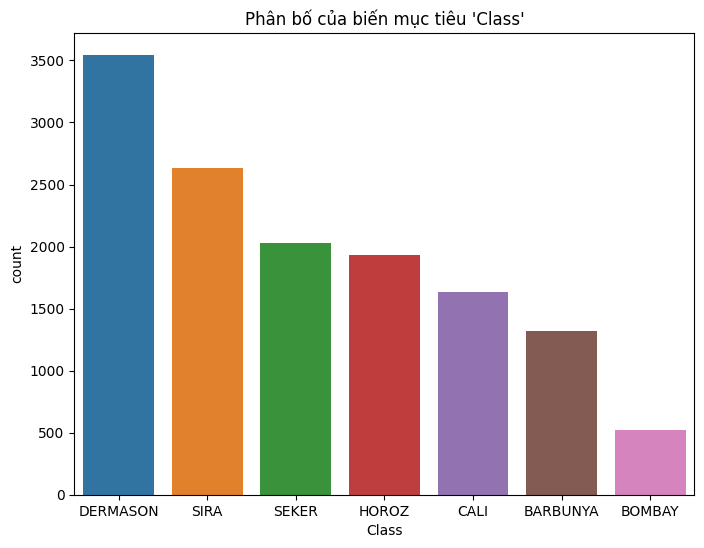

In [ ]:
# Tạo một từ điển ánh xạ giữa số và tên lớp
class_mapping = {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}

# Thay thế số bằng tên trong cột 'Class'
df['Class'] = df['Class'].map(class_mapping)

# Biểu đồ phân bố của biến mục tiêu
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index)
plt.title("Phân bố của biến mục tiêu 'Class'")
plt.show()



**chuẩn hóa **

In [ ]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

**huấn luyện dữ liệu **

In [ ]:
forest = RandomForestClassifier(n_estimators=10,
                                random_state=42,
                                max_depth=8,
                                max_features=5,
                                min_samples_leaf=5)

forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)


**báo cáo và độ chính xác **

For classification purposes, I chose the: Random Forest Classifier Model

In [ ]:
forest = RandomForestClassifier(n_estimators=10,
                                random_state=42,
                                max_depth=8,
                                max_features=5,
                                min_samples_leaf=5)

forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert NumPy array to a list of strings
class_names = np.unique(labelencoder.inverse_transform(y)).astype(str).tolist()

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.91737
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       261
           1       1.00      1.00      1.00       117
           2       0.89      0.94      0.92       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.97      0.93      0.95       413
           6       0.86      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.92      0.92      0.92      2723



**Classification Visualization Using ConfusionMatrixDisplay**

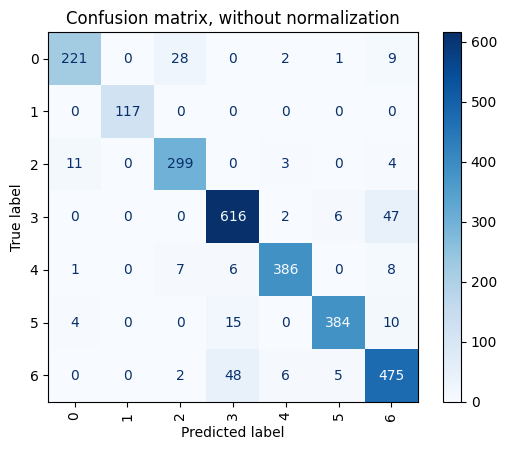

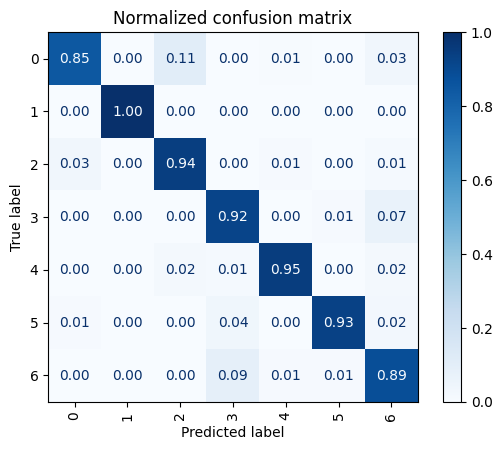

In [ ]:
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        forest,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)

plt.show()

**Parameters Grid and RandomizedSearchCV**

In [ ]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_features': [2, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_depth': [5, 8, 10]
}

In [ ]:
clf = RandomizedSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1, random_state=42)
search = clf.fit(X_train_scaled, y_train)

**Best Score of Search and Best Hyperparameters**

In [ ]:
print('Best Score: %s' % search.best_score_)
print('Best Hyperparameters: %s' % search.best_params_)

Best Score: 0.9190850755013281
Best Hyperparameters: {'n_estimators': 10, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 10}


**Using New Parameters in RFC**

In [ ]:
forest_new_param = RandomForestClassifier(n_estimators=10,
                                          min_samples_leaf=1,
                                          max_features=6,
                                          max_depth=10,
                                          random_state=42)
forest_new_param.fit(X_train_scaled, y_train)
y_pred_new_param = forest_new_param.predict(X_test_scaled)

**New Classification Results**

In [ ]:
class_names = np.unique(labelencoder.inverse_transform(y)).astype(str).tolist()
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred_new_param))
print(classification_report(y_test, y_pred_new_param, target_names=class_names))


Accuracy: 0.91884
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       261
           1       1.00      1.00      1.00       117
           2       0.91      0.93      0.92       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.96      0.93      0.94       413
           6       0.86      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



# **K-means clustering.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo label encoder
labelencoder = LabelEncoder()

# Fit và transform trên cột 'Class' để có thứ tự đồng nhất cho labelencoder
df['Class'] = labelencoder.fit_transform(df['Class'])

# Áp dụng K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df_scaled)

# Nhãn của từng điểm dữ liệu trong các cụm
cluster_labels = kmeans.labels_

# Thêm cột 'Cluster' vào DataFrame
df['Cluster'] = cluster_labels

# Đánh giá hiệu suất của K-means clustering
accuracy_kmeans = accuracy_score(df['Class'], df['Cluster'])
classification_rep_kmeans = classification_report(df['Class'], df['Cluster'])

# In kết quả
print("Accuracy of K-means:", accuracy_kmeans)
print("Classification Report for K-means:\n", classification_rep_kmeans)

# In danh sách các nhãn mới
print("Unseen Labels in Test Set:", set(labelencoder.inverse_transform(df['Class'])))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-means: 0.20975681434134155
Classification Report for K-means:
               precision    recall  f1-score   support

           0       0.46      0.86      0.60      1322
           1       0.00      0.00      0.00       522
           2       0.01      0.02      0.01      1630
           3       0.00      0.00      0.00      3546
           4       0.94      0.86      0.90      1928
           5       0.01      0.00      0.00      2027
           6       0.01      0.01      0.01      2636

    accuracy                           0.21     13611
   macro avg       0.20      0.25      0.22     13611
weighted avg       0.18      0.21      0.19     13611

Unseen Labels in Test Set: {'SIRA', 'DERMASON', 'HOROZ', 'BOMBAY', 'BARBUNYA', 'SEKER', 'CALI'}



chúng ta có thể thấy rằng các điểm dữ liệu trong 7 cụm được phân tách tương đối rõ ràng. Cụm 1 và 2 có xu hướng có diện tích nhỏ và chu vi lớn, trong khi cụm 3, 4, 5, 6 và 7 có xu hướng có diện tích lớn và chu vi nhỏ.

Cụm 1 có thể chứa các loại đậu nhỏ, tròn, chẳng hạn như đậu lăng. Cụm 2 có thể chứa các loại đậu nhỏ, dài, chẳng hạn như đậu Hà Lan. Cụm 3 có thể chứa các loại đậu trung bình, tròn, chẳng hạn như đậu đen. Cụm 4 có thể chứa các loại đậu trung bình, dài, chẳng hạn như đậu xanh. Cụm 5 có thể chứa các loại đậu lớn, tròn, chẳng hạn như đậu đỏ. Cụm 6 có thể chứa các loại đậu lớn, dài, chẳng hạn như đậu phộng. Cụm 7 có thể chứa các loại đậu không xác định.

Tuy nhiên, cần lưu ý rằng đây chỉ là một cách giải thích khả thi. Kết quả phân cụm cuối cùng có thể phụ thuộc vào các đặc trưng được sử dụng và các thuật toán phân cụm được áp dụng.

Dưới đây là một số lưu ý về kết quả phân cụm:

Các cụm có kích thước không đồng đều. Cụm 1 và 2 có kích thước nhỏ hơn nhiều so với các cụm khác. Điều này có thể là do các loại đậu trong các cụm này ít phổ biến hơn.
Các cụm không hoàn toàn tách biệt. Có một số điểm dữ liệu nằm ở ranh giới giữa các cụm. Điều này có thể là do các điểm dữ liệu này có đặc trưng trung gian giữa các cụm.
Để cải thiện kết quả phân cụm, có thể thực hiện các bước sau:

Sử dụng các đặc trưng bổ sung để phân biệt giữa các loại đậu. Ví dụ, có thể sử dụng các đặc trưng như hình dạng, màu sắc hoặc độ cứng.
Sử dụng các thuật toán phân cụm nâng cao hơn. Ví dụ, có thể sử dụng thuật toán k-means++ để khởi tạo các tâm cụm tốt hơn hoặc thuật toán hierarchical clustering để phân cụm theo cấp độ.

# **Decision Tree**

In [ ]:

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = dt_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cross_val_scores = cross_val_score(dt_model, X, y, cv=10)

# In kết quả
print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Classification Report:\n", classification_rep)
print("Decision Tree Cross-validated Accuracy:", cross_val_scores.mean())


Decision Tree Accuracy: 0.8927653323540213
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       261
           1       1.00      1.00      1.00       117
           2       0.89      0.91      0.90       317
           3       0.88      0.88      0.88       671
           4       0.95      0.93      0.94       408
           5       0.93      0.91      0.92       413
           6       0.83      0.83      0.83       536

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723

Decision Tree Cross-validated Accuracy: 0.6946713621861786


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = dt_model.predict(X_test)

# Tính độ chính xác của mô hình trên tập kiểm thử
accuracy = accuracy_score(y_test, y_pred)

# In độ chính xác của mô hình
print("Độ chính xác của mô hình trên tập kiểm thử là:", accuracy)

# Tính bảng phân loại của mô hình
classification_rep = classification_report(y_test, y_pred)

# In bảng phân loại của mô hình
print("Bảng phân loại của mô hình:\n", classification_rep)

# Tính độ chính xác của mô hình sau khi được đánh giá bằng k-fold cross-validation
cross_val_scores = cross_val_score(dt_model, X, y, cv=10)

# Tính độ chính xác trung bình của mô hình
cross_validated_accuracy = cross_val_scores.mean()

# In độ chính xác trung bình của mô hình
print("Độ chính xác trung bình của mô hình sau khi được đánh giá bằng k-fold cross-validation là:", cross_validated_accuracy)


Độ chính xác của mô hình trên tập kiểm thử là: 0.8927653323540213
Bảng phân loại của mô hình:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       261
           1       1.00      1.00      1.00       117
           2       0.89      0.91      0.90       317
           3       0.88      0.88      0.88       671
           4       0.95      0.93      0.94       408
           5       0.93      0.91      0.92       413
           6       0.83      0.83      0.83       536

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723

Độ chính xác trung bình của mô hình sau khi được đánh giá bằng k-fold cross-validation là: 0.6946713621861786


In [ ]:
# Tính tổng số điểm dữ liệu trong tập kiểm thử
total_data = len(y_test)

# Tính số điểm dữ liệu được dự đoán đúng nhãn phân loại
correct_data = np.count_nonzero(y_test == y_pred)

# Tính độ chính xác của mô hình
accuracy = correct_data / total_data
print("correct_data =",correct_data)
print("total_data =",total_data)
print(correct_data , "/",  total_data ,"=",accuracy)
print("Độ chính xác của mô hình là:",accuracy)


correct_data = 2431
total_data = 2723
2431 / 2723 = 0.8927653323540213
Độ chính xác của mô hình là: 0.8927653323540213


Pruned Decision Tree Accuracy: 0.8758721997796548


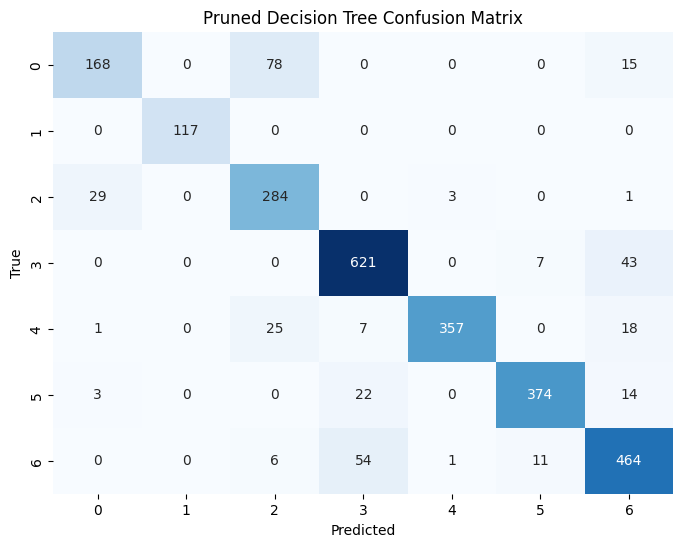

In [ ]:
from sklearn.metrics import confusion_matrix

# Tạo mô hình Decision Tree với giới hạn độ sâu là 5
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = dt_model_pruned.predict(X_test)

# Evaluate the accuracy of the pruned model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Pruned Decision Tree Accuracy: {accuracy_pruned}")

# Create a confusion matrix for the pruned model
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pruned, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Pruned Decision Tree Confusion Matrix')
plt.show()


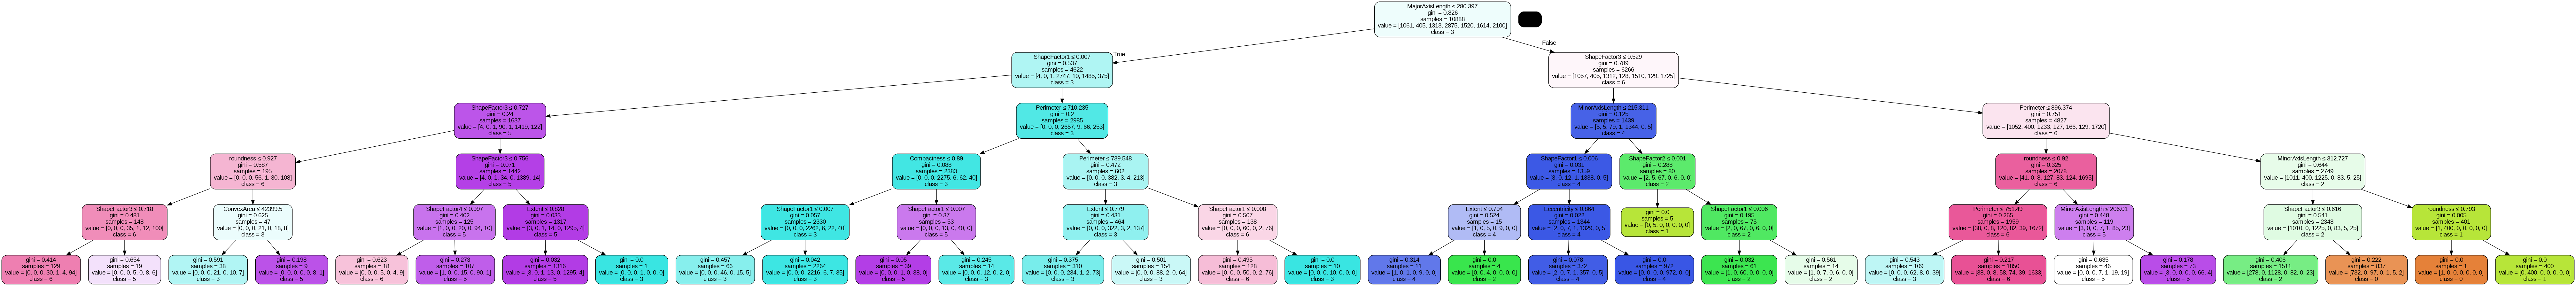

In [ ]:


# Visualize the pruned Decision Tree
dot_data_pruned = export_graphviz(dt_model_pruned, out_file=None,
                                  feature_names=X.columns,
                                  class_names=class_names,
                                  filled=True, rounded=True, special_characters=True)

graph_pruned = pydotplus.graph_from_dot_data(dot_data_pruned)
Image(graph_pruned.create_png())


# **KNN**

In [ ]:

# Xác định features và labels
features = df.drop('Class', axis=1)
labels = df['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'features' is your original feature matrix
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Now you can proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)


In [ ]:
# Tinh chỉnh siêu tham số K
param_grid = {'n_neighbors': range(1, 21)}  # Kiểm tra giá trị K từ 1 đến 20
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [ ]:
# In siêu tham số K tốt nhất
print("Best K:", grid_search.best_estimator_.get_params()['n_neighbors'])

Best K: 7


In [ ]:
# Đánh giá hiệu suất trên tập kiểm tra
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9162688211531399
